# Differentially Private Histograms

## Plotting the distribugion of ages in `Adult`

In [1]:
import numpy as np
from diffprivlib import tools as dp
import matplotlib.pyplot as plt

We first read in the list of ages in the Adult UCI dataset (the first column).

In [2]:
ages_adult = np.loadtxt("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
                        usecols=0, delimiter=", ")

Using Numpy's native `histogram` function, we can find the distribution of ages, as determined by ten equally-spaced bins calculated by `histogram`.

In [3]:
hist, bins = np.histogram(ages_adult)
hist = hist / hist.sum()

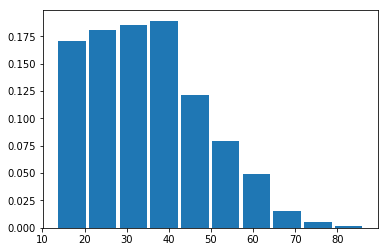

In [15]:
plt.bar(bins[:-1], hist, width=(bins[1]-bins[0]) * 0.9)
plt.show()

## Differentially private histograms

Using `diffprivlib`, we can calculate a differentially private version of the histogram. For this example, we use the default settings:
- `epsilon` is 1.0
- `range` is not specified, so is calculated by the function on-the-fly. This throws a warning, as it leaks privacy about the data (from `dp_bins`, we know that there are people in the dataset aging 17 and 90).

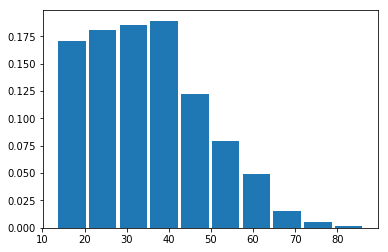

In [20]:
dp_hist, dp_bins = dp.histogram(ages_adult)
dp_hist = dp_hist / dp_hist.sum()

plt.bar(dp_bins[:-1], dp_hist, width=(dp_bins[1] - dp_bins[0]) * 0.9)
plt.show()

We can see very little difference in the values of the histgram. This is expected, due to the large size of the dataset (`n=48842`). We can see that the bins returned by `dpl.tools.histogram` are identical to those given by `np.histogram`.

In [21]:
np.all(dp_bins == bins)

True

## Deciding on the `range` parameter

We know from the [dataset description](https://archive.ics.uci.edu/ml/datasets/adult) that everyone in the dataset is at least 17 years of age. We don't know off-hand what the upper bound is, so for this example we'll set the upper bound to `100`. As of 2019, less than 0.005% of the world's population is [aged over 100](https://en.wikipedia.org/wiki/Centenarian), so this is an appropriate simplification.

A lower `epsilon` value on this occasion results in large changes in the histogram distribution. The greater privacy guarantee has come at the cost of accuracy.

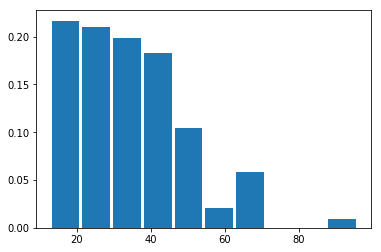

In [19]:
dp_hist2, dp_bins2 = dp.histogram(ages_adult, epsilon=0.001, range=(17, 100))
dp_hist2 = dp_hist2 / dp_hist2.sum()

plt.bar(dp_bins2[:-1], dp_hist2, width=(dp_bins2[1] - dp_bins2[0]) * 0.9)
plt.show()